# Impacto da Campanha de Marketing


In [1]:
# Versão Python
from platform import python_version
print('Python version: {}' .format(python_version()))

Python version: 3.12.4


In [ ]:
# Importação das bibliotecas necessárias
!pip install summarytools

from summarytools import dfSummary
from sklearn import datasets

import pandas as pd
import numpy as np
import math
import statistics 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, levene

#### Gerando os dados randômicos

In [4]:
n_observacoes = 1_000_000

data = {
    'id' : range(1, n_observacoes + 1),
    'vendas' : np.random.normal(loc = 500, scale = 50, size = n_observacoes)
}

df_vendas = pd.DataFrame(data)


#### Extraindo uma amostra dos nossos dados

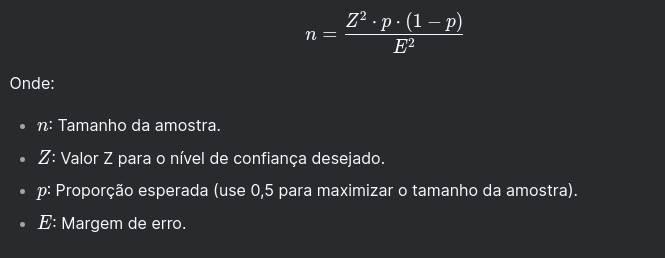

In [5]:
nivel_confianca = 0.95
margem_erro = 0.01
p = 0.5

# Calculamos o Valor Z para o nível de confiança
z = norm.ppf(1 - (1 - nivel_confianca) / 2)       # 1.96 para 95% de confiança
print('Valor Z:', z)

# Calcula o tamanho da amostra
n = ((z ** 2) * p * (1 - p)) / (margem_erro ** 2)
n = math.ceil(n)              # Arredonda para o próximo número inteiro

print(f'O tamanho da amostra necessário: {n}')

Valor Z: 1.959963984540054
O tamanho da amostra necessário: 9604


#### Extraindo a amostra dos dados

In [6]:
amostra = df_vendas.sample(n = n, random_state = 42)       # random_state usado para reprodutibilidade


# Caso queira salvar a amostra em um arquivo .csv
# amostra.to_csv('amostra_vendas.csv', index = False)

#### Summary

O objetivo é observar as estatísticas de cada coluna e se há simetria ou não entre os dados, de uma forma mais visual.

Também obtemos informações como o tipo de cada coluna e se há valores nulos.

In [7]:
dfSummary(amostra)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 499128.5 (290077.9)min < med < max:79.0 < 498113.5 < 999593.0IQR (CV) : 506818.2 (1.7),"9,604 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACuUlEQVR4nO3ZvW7aUByG8deQD5NQI5SUbCwdK3VgZOkd9GK7dkuk5AYydOmUJYqEHCPcIIihQ5WqUiXAPjHwps9vTQ4cx8/fB5RouVwK2HeNXW8A2MTBrjeA/RFFUUvSUcBLzJbL5dNr7edvhApJvyM9Ozv7kiRJt+prjMfjNIqir3XEujbUwClrSFpUXCvVOKH4x1GSJN3hcPjU6XSmZRdnWRZfXV31RqPReRRF4wrvv/Jerww1ZMqKojjM8/xDu93+0Wg05mXXS9Lj4+MkiqJvkkr/4RQY+Q4HdKfD2el0pr1e72fZdXmeH87n80/9fr/ZbDZL3691T+N1T9TKU3Z3d9e9vb19PxgMvl9cXKRl1krS/f39u5ubm8/9fv+8jgtfZZcDGjic0o5Cn81mB3EcnwwGg2nZ+51lWXx9fd0djUZHkiqFKqnalKVp2pKk09PTShOapmkr5MIDj6Gk3W73hsPheJsDGjqcUr2fEzdR9X5Laq364d5/mapy4aHH0Hw+j4ui+Hh8fHy5zQENGU5psyeTq70PtYqQY0j681Q8eX5+btaxv3UCnkoqiiKRlERRVHZpslgsDqu85za8yVBfhHzsqGM/dQs5SV5Okel0eimp0pDU6U2H+r8JOUl2fYqsQ6hvUNXPx3Xt5zXwv35YIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYONjkl7Isi8u+8GQyiSUpz/P44eHhZJvrXd/bdd+h6zfp6xfxuHz32AQEaQAAAABJRU5ErkJggg=="">",0(0.0%)
2,vendas[float64],Mean (sd) : 499.7 (49.9)min < med < max:323.0 < 499.6 < 674.9IQR (CV) : 67.4 (10.0),"9,604 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACo0lEQVR4nO3dT07bQBiG8W8a/jiB2oqQwi4XqNRFlj5ED9sjsGDRNTdggxDIIsLFiuO4m1ZqJUprT4znnTy//ZBZPFhK5PnGtW1rQOg+jL0B4H8cjb2BGDnnpmZ20nP5pm3bl33uJwaEumfOuenFxcWXNE3nfdav1+vCOfeVWP9EqH/h8VRMz8/PF3mer7Msq7osfHp6Sq6vr+ePj48nZkaovyHUV/g8Feu6Tpqm+XR6enq1WCy+9/j4aY810SPU152kaTrP8/yl61Px9vZ2fnNzM9tut5OhNneICPUNWZZVXZ+KRVHwRBwAP09BAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCQrRnpjyHQKS73e54n/uBnyhD9R0C8evIc1VVV2bW58hzb03THJtZ6pzr+yeinLQSZajmcdzZbLwjz2VZHtd1/Xm5XE4mk0nnfZvFO2kl1lDNrN9xZ7PxjjxvNpujJElmq9Wqury8LLquj3nSStShqjo7O+v1D/ZTlHMF+NYPCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCZxCjYznAItgh1cEHarHWJ6DHMnjO8Ai5OEVwYbqM5ZnzJE8Y/IZYBH68IpgQzWPsTxjjeQJhccAi2CHV4Qcqpn1G8sz1kgeDIdv/ZBAqJBAqJBAqJBAqJBAqJBAqJAw6O+o3EyiJeSLLgYLVflmkkMU+kUXQz5RJW8mOVShX3Txz1B932DKsqxQupnk0PlcdNE0TWoDvWL4Zqj7eIPp4eHhW9e1ZmbPz8+JmVlZlsn9/f3svdaO+dmq+zYzu7u7+zjkK4Y/AEdQcR0qAQqLAAAAAElFTkSuQmCC"">",0(0.0%)


#### Divisão do Grupo Tratamento


In [28]:
proporcao_tratamento = 0.7

grupo_tratamento, grupo_controle = train_test_split(
    amostra, test_size = 1 - proporcao_tratamento, random_state = 42
)

In [29]:
# Contagem dos valores de vendas para GT
print("Tamanho_GT: ", grupo_tratamento['vendas'].count())

# Contagem dos valores de vendas para GC
print("Tamanho_GC: ",grupo_controle['vendas'].count())

Tamanho_GT:  6722
Tamanho_GC:  2882


#### Simulação Após a Campanha

In [32]:
# Grupo que recebeu a campanha
grupo_tratamento['vendas_campanha'] =  grupo_tratamento['vendas'] + np.random.normal(loc = 30, scale = 10, size = len(grupo_tratamento))

# Grupo que não recebeu a campanha
grupo_controle['vendas_campanha'] = grupo_controle['vendas'] + np.random.normal(loc = 0, scale = 10, size = len(grupo_controle))

In [33]:
# Criação da coluna Grupo com os dados de tratamento e controle. Importante quando unirmos as tabelas e termos 
# os dados separados de que é GT e GC.
grupo_tratamento['Grupo'] = "Tratamento"
grupo_controle['Grupo'] = "Controle"

print(grupo_tratamento.head(4),'\n')
print(grupo_controle.head(4))

            id      vendas  vendas_campanha       Grupo
614658  614659  511.080610       534.934553  Tratamento
631567  631568  385.121028       420.890391  Tratamento
596499  596500  490.942402       520.401140  Tratamento
218060  218061  640.517380       698.146111  Tratamento 

            id      vendas  vendas_campanha     Grupo
813642  813643  455.009146       456.968938  Controle
193389  193390  440.357057       432.845782  Controle
151611  151612  554.302402       564.800461  Controle
704935  704936  463.568278       456.242816  Controle


#### União entre o grupo que foi exposto à campanha de marketing e o que não foi exposto.

In [34]:
grupos = pd.concat([grupo_tratamento, grupo_controle])
grupos


,id,vendas,vendas_campanha,Grupo
614658,614659,511.080610,534.934553,Tratamento
631567,631568,385.121028,420.890391,Tratamento
596499,596500,490.942402,520.401140,Tratamento
218060,218061,640.517380,698.146111,Tratamento
286356,286357,507.930267,551.220674,Tratamento
...,...,...,...,...
674239,674240,387.474166,381.134438,Controle
257758,257759,428.200373,421.639246,Controle
342253,342254,456.652571,468.993737,Controle
211718,211719,561.360241,550.690852,Controle


#### Normalidade com Q-Q Plot

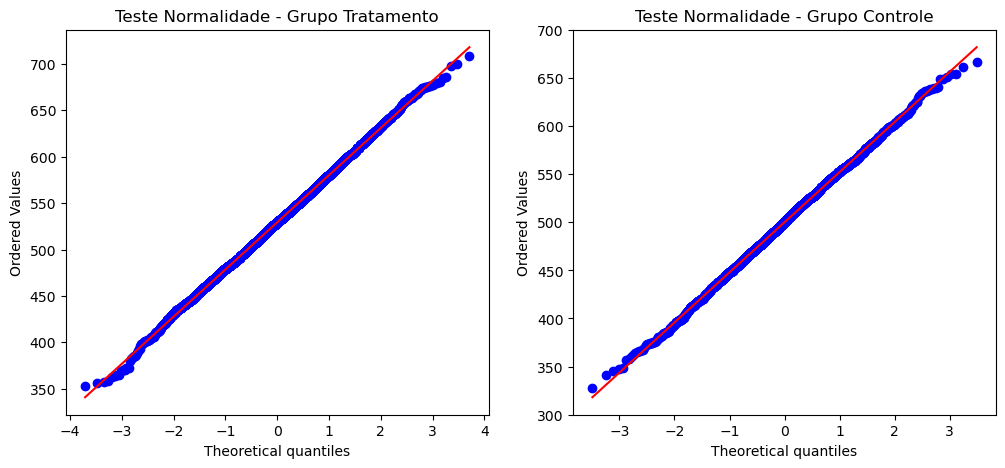

In [36]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(grupo_tratamento['vendas_campanha'], dist = 'norm', plot = plt)
plt.title("Teste Normalidade - Grupo Tratamento")


plt.subplot(1, 2, 2)
stats.probplot(grupo_controle['vendas_campanha'], dist = 'norm', plot = plt)
plt.title("Teste Normalidade - Grupo Controle")
plt.show()

#### Teste de Anderson-Darling (para cada grupo)

Após observar o gráfico Q-Q Plot, as extremidades dos dados da nossa amostra possuem uma leve variação e é considerado grande para o nossos futuros testes. Por este motivo resolvi aplicar o teste de normalidade de Anderson-Darling que é mais indicador quando temos um conjunto de dados maior e variabilidade nas extremidades.

*O motivo de não aplicar o teste de **Komogorov-Smirnov** é que por mais ele atenda ao tamanho do conjunto de dados que possuímos, ele acaba sendo mais sensível a pequenas variações nas extremidades dos dados.*

In [ ]:
# Grupo Tratamento
ad_gt = stats.anderson(grupo_tratamento['vendas_campanha'], dist = 'norm')

print("Teste de Anderson-Darling:")
print(f"Estatística de teste: {ad_gt.statistic}")
print("Valores críticos: ", ad_gt.critical_values)
print("Níveis de significância: ", ad_gt.significance_level)

Teste de Anderson-Darling:
Estatística de teste: 0.6030070188098762
Valores críticos:  [0.576 0.656 0.787 0.917 1.091]
Níveis de significância:  [15.  10.   5.   2.5  1. ]


In [ ]:
# Grupo Controle
ad_gt = stats.anderson(grupo_controle['vendas_campanha'], dist = 'norm')

print("Teste de Anderson-Darling:")
print(f"Estatística de teste: {ad_gt.statistic}")
print("Valores críticos: ", ad_gt.critical_values)
print("Níveis de significância: ", ad_gt.significance_level)

Teste de Anderson-Darling:
Estatística de teste: 0.45750029872760933
Valores críticos:  [0.575 0.655 0.786 0.917 1.09 ]
Níveis de significância:  [15.  10.   5.   2.5  1. ]


#### Homogeneidade das Variancias- Teste de Levene

O teste calcula uma estatística W, que mede a diferença entre as médias dos desvios absolutos dos grupos em relação às suas médias.

Usado para verificar se dois ou mais grupos têm variância iguais.

Essa é uma suposição importante para muitos testes estatísticos, como o `teste t` e `ANOVA`


---
* `Teste t:` variâncias diferentes, faz com que o teste t seja menos confiável. Neste caso, usamos o `teste t de Welch`, que não assume variâncias iguais.

---

In [43]:
stat, p_valor = levene(grupo_controle['vendas_campanha'], grupo_tratamento['vendas_campanha'])

print(f'Estatística de Levene: {stat}')
print(f'p-valor: {p_valor}')

if p_valor < 0.05:
    print('Rejeitamos H0. A variância é heterogênea')
else:
    print('Não há evidências suficientes para rejeitar H0. A variância é homogênea!')

Estatística de Levene: 4.302699056019413
p-valor: 0.03807851991468202
Rejeitamos H0. A variância é heterogênea


#### Teste de Independência

A independência significa que as observações de um grupo não influenciam as observações do outro grupo. Isso é garantido pelo desenho experimental (grupos separados).


Se as observações não forem independentes, o teste t pode dar resultados incorretos.

#### `Teste t de Welch`

 Valores positivos da *Estatística do teste* indicam que o grupo tratamento teve vendas maiores que o controle.

In [47]:
t_stat, p_value = ttest_ind(grupo_tratamento['vendas_campanha'], grupo_controle['vendas_campanha'], equal_var = False)


In [48]:
print(f'Estatística do teste (t): {t_stat}')
print(f'Valor-p: {p_value}')

if p_value < 0.05:
    print("Rejeitamos a Hipótese Nula. Houve um impacto significativo nas campanha de marketing")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. Não houve impacto a partir da campanha!")

Estatística do teste (t): 25.468208169099295
Valor-p: 4.0217815546842403e-135
Rejeitamos a Hipótese Nula. Houve um impacto significativo nas campanha de marketing


#### Tamanho do Efeito - Cohen's d

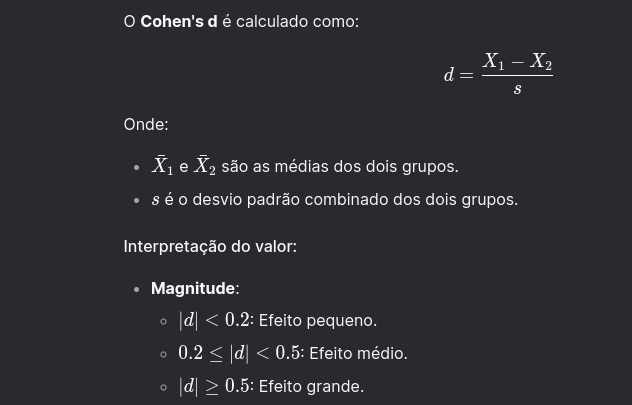

In [49]:
def cohens_d(grupo1, grupo2):
    n1, n2 = len(grupo1), len(grupo2)
    var1, var2 = np.var(grupo1, ddof=1), np.var(grupo2, ddof=1)
    s_p = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(grupo1) - np.mean(grupo2)) / s_p

d = cohens_d(grupo_tratamento['vendas_campanha'], grupo_controle['vendas_campanha'])

if d < 0.2:
    print(f"Cohen's d: {d:.2f}\nEfeito pequeno!")
elif d <= 0.5:
     print(f"Cohen's d: {d:.2f}\nEfeito médio!")
else:
     print(f"Cohen's d: {d:.2f}\nEfeito grande!")

Cohen's d: 0.57
Efeito grande!


`O tamanho do efeito está entre moderado e grande, e, neste caso, o grupo que recebeu os cupons teve um desempenho melhor do que os clientes pertencentes ao grupo que não recebeu os cupons.`